## Preprocessing Data

In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels =  []
train_samples = []

Example data: 
- An experiemental drug was tested on individuals from ages 13 to 100. 
- The trial had 2100 participants. Half were under 65 years old, half were over 65 years old.
- 95% of patientes 65 or older experienced side effects.
- 95% of patients under 65 experienced no side effects.

In [3]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
#print raw data
for i in train_samples:
    print(i)

51
87
46
95
31
84
26
72
53
76
29
74
64
97
29
97
25
85
31
68
41
71
30
83
27
89
17
68
18
81
60
89
30
71
28
83
45
81
25
99
25
68
54
94
52
85
51
76
60
79
37
89
34
66
58
90
33
95
48
88
62
95
35
79
20
90
55
98
14
72
42
100
53
70
51
94
39
68
61
81
39
71
41
74
43
91
50
98
18
92
34
80
51
78
45
96
20
72
57
77
60
95
52
87
50
80
40
98
25
91
49
94
41
97
25
73
29
81
22
78
39
98
16
65
60
66
33
93
41
75
50
94
40
91
64
88
56
96
58
73
57
84
58
95
61
81
39
79
47
76
22
88
54
85
63
74
46
91
38
88
17
81
15
84
26
72
58
72
49
67
52
69
44
74
36
78
38
65
28
90
14
73
24
97
56
77
64
76
46
87
31
76
47
92
18
88
46
77
60
78
57
90
19
81
30
84
22
70
28
98
50
81
45
100
62
70
51
98
29
72
36
82
56
81
44
88
19
91
46
97
15
77
58
90
46
86
35
66
18
71
23
100
51
86
48
68
29
95
14
70
18
89
33
89
36
85
22
76
43
80
49
93
54
96
20
85
17
78
24
99
51
89
57
92
29
86
39
66
34
100
28
80
28
99
32
96
18
79
28
76
46
70
35
66
61
82
60
73
50
80
49
100
63
78
40
71
51
72
39
65
32
69
39
87
62
99
16
66
30
77
42
69
61
87
17
98
31
72
50
98
57
71

In [5]:
for i in train_labels:
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
#train_labels,train_samples=shuffle(train_labels,train_samples)

In [7]:
#use sclar objec to reshape fit transofrm the input vals to 0-1 form
#reshape because the function acceepts 2Dimenationsl input

scaler = MinMaxScaler(feature_range=(0,1))

scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

In [8]:
#print scaled data
for i in scaled_train_samples:
    print(i)

[0.43678161]
[0.85057471]
[0.37931034]
[0.94252874]
[0.20689655]
[0.81609195]
[0.14942529]
[0.67816092]
[0.45977011]
[0.72413793]
[0.18390805]
[0.70114943]
[0.5862069]
[0.96551724]
[0.18390805]
[0.96551724]
[0.13793103]
[0.82758621]
[0.20689655]
[0.63218391]
[0.32183908]
[0.66666667]
[0.1954023]
[0.8045977]
[0.16091954]
[0.87356322]
[0.04597701]
[0.63218391]
[0.05747126]
[0.7816092]
[0.54022989]
[0.87356322]
[0.1954023]
[0.66666667]
[0.17241379]
[0.8045977]
[0.36781609]
[0.7816092]
[0.13793103]
[0.98850575]
[0.13793103]
[0.63218391]
[0.47126437]
[0.93103448]
[0.44827586]
[0.82758621]
[0.43678161]
[0.72413793]
[0.54022989]
[0.75862069]
[0.27586207]
[0.87356322]
[0.24137931]
[0.6091954]
[0.51724138]
[0.88505747]
[0.22988506]
[0.94252874]
[0.40229885]
[0.86206897]
[0.56321839]
[0.94252874]
[0.25287356]
[0.75862069]
[0.08045977]
[0.88505747]
[0.48275862]
[0.97701149]
[0.01149425]
[0.67816092]
[0.33333333]
[1.]
[0.45977011]
[0.65517241]
[0.43678161]
[0.93103448]
[0.29885057]
[0.63218391]
[0

[0.62068966]
[0.01149425]
[0.64367816]
[0.29885057]
[0.98850575]
[0.32183908]
[0.72413793]
[0.03448276]
[0.90804598]
[0.05747126]
[0.72413793]
[0.17241379]
[0.83908046]
[0.10344828]
[0.97701149]
[0.54022989]
[0.83908046]
[0.1954023]
[0.75862069]
[0.33333333]
[0.85057471]
[0.34482759]
[0.91954023]
[0.56321839]
[0.7816092]
[0.56321839]
[0.94252874]
[0.44827586]
[0.97701149]
[0.01149425]
[0.77011494]
[0.13793103]
[0.79310345]
[0.36781609]
[0.97701149]
[0.51724138]
[0.83908046]
[0.36781609]
[1.]
[0.37931034]
[0.65517241]
[0.18390805]
[0.72413793]
[0.45977011]
[0.65517241]
[0.33333333]
[0.97701149]
[0.5862069]
[0.87356322]
[0.29885057]
[1.]
[0.27586207]
[0.81609195]
[0.22988506]
[0.63218391]
[0.14942529]
[0.88505747]
[0.06896552]
[0.72413793]
[0.43678161]
[0.86206897]
[0.16091954]
[0.7816092]
[0.29885057]
[0.88505747]
[0.]
[0.71264368]
[0.29885057]
[0.96551724]
[0.27586207]
[0.85057471]
[0.47126437]
[0.91954023]
[0.44827586]
[0.59770115]
[0.27586207]
[0.81609195]
[0.14942529]
[0.73563218]
[

[0.83908046]
[0.02298851]
[1.]
[0.49425287]
[0.88505747]
[0.34482759]
[0.59770115]
[0.27586207]
[0.71264368]
[0.40229885]
[0.8045977]
[0.06896552]
[0.94252874]
[0.32183908]
[0.8045977]
[0.5862069]
[0.62068966]
[0.36781609]
[0.95402299]
[0.09195402]
[0.83908046]
[0.42528736]
[0.86206897]
[0.01149425]
[0.81609195]
[0.57471264]
[0.67816092]
[0.10344828]
[0.71264368]
[0.18390805]
[0.83908046]
[0.36781609]
[0.75862069]
[0.12643678]
[0.66666667]
[0.03448276]
[0.74712644]
[0.22988506]
[0.89655172]
[0.4137931]
[0.97701149]
[0.42528736]
[0.87356322]
[0.04597701]
[0.86206897]
[0.3908046]
[0.77011494]
[0.54022989]
[0.77011494]
[0.44827586]
[0.77011494]
[0.27586207]
[0.91954023]
[0.03448276]
[0.64367816]
[0.51724138]
[0.96551724]
[0.35632184]
[0.59770115]
[0.3908046]
[0.87356322]
[0.14942529]
[0.62068966]
[0.50574713]
[0.85057471]
[0.55172414]
[0.98850575]
[0.25287356]
[0.62068966]
[0.48275862]
[0.71264368]
[0.4137931]
[0.70114943]
[0.14942529]
[0.98850575]
[0.16091954]
[0.65517241]
[0.13793103]
[

## Simple Sequential Model


In [9]:
# import keras
# from keras import backend as K
# from keras.models import Sequential
# from keras.layers import Activation
# from keras.layers.core import Dense
# from keras.optimizers import Adam
# from keras.metrics import categorical_crossentropy

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
print("Import Complete")

Import Complete


### Physical Device Code here, refer 21:36 in https://www.youtube.com/watch?v=qFJeN9V1ZsI&t=3990s

In [10]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])


#shape (1,)
#Softmax

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(scaled_train_samples, train_labels, batch_size=10, epochs=20, shuffle=True, verbose=2)

#with validatin set (note that here the validation split it taken before the shuffle)
#model.fit(scaled_train_samples, train_labels,validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
210/210 - 0s - loss: 0.6871 - accuracy: 0.4600
Epoch 2/20
210/210 - 0s - loss: 0.6595 - accuracy: 0.5600
Epoch 3/20
210/210 - 0s - loss: 0.6337 - accuracy: 0.6305
Epoch 4/20
210/210 - 0s - loss: 0.6021 - accuracy: 0.7024
Epoch 5/20
210/210 - 0s - loss: 0.5701 - accuracy: 0.7462
Epoch 6/20
210/210 - 0s - loss: 0.5393 - accuracy: 0.7829
Epoch 7/20
210/210 - 0s - loss: 0.5084 - accuracy: 0.8100
Epoch 8/20
210/210 - 0s - loss: 0.4778 - accuracy: 0.8357
Epoch 9/20
210/210 - 0s - loss: 0.4487 - accuracy: 0.8486
Epoch 10/20
210/210 - 0s - loss: 0.4204 - accuracy: 0.8733
Epoch 11/20
210/210 - 0s - loss: 0.3949 - accuracy: 0.8895
Epoch 12/20
210/210 - 0s - loss: 0.3722 - accuracy: 0.8957
Epoch 13/20
210/210 - 0s - loss: 0.3530 - accuracy: 0.9081
Epoch 14/20
210/210 - 0s - loss: 0.3364 - accuracy: 0.9124
Epoch 15/20
210/210 - 0s - loss: 0.3228 - accuracy: 0.9171
Epoch 16/20
210/210 - 0s - loss: 0.3115 - accuracy: 0.9200
Epoch 17/20
210/210 - 0s - loss: 0.3021 - accuracy: 0.9248
Epoch 

# Save and Load Model

## 1. model.save()

In [14]:
model.save('medical_trial_model.h5')

This save functions saves:
- The architecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss, optimizer).
- The state of the optimizer, allowing to resume training exactly where you left off.


In [15]:
# from keras.models import load_model
from tensorflow.keras.models import load_model
new_model = load_model('medical_trial_model.h5')

In [16]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [17]:
new_model.get_weights()

[array([[ 0.41372424,  0.6524636 , -0.34144372,  0.25752258,  0.32359225,
          0.41191018, -0.21686739,  0.26370576, -0.5471318 , -0.28199568,
          0.6752724 ,  0.41047135, -0.08396298,  0.61005986, -0.24535155,
         -0.44431698]], dtype=float32),
 array([-0.12119535, -0.13400991,  0.        , -0.08635998, -0.10068333,
        -0.1104491 ,  0.        , -0.08990652,  0.        ,  0.        ,
        -0.16356657, -0.10960858,  0.        ,  0.28237945,  0.        ,
         0.        ], dtype=float32),
 array([[-0.34954125, -0.02028891, -0.2687682 ,  0.35928366, -0.20708258,
          0.5317146 ,  0.08298188,  0.29856405,  0.47302622,  0.06901672,
         -0.18850605, -0.17144452, -0.3198312 , -0.03432751, -0.31896785,
         -0.24109042,  0.19920185,  0.01835589,  0.3745748 ,  0.12011906,
         -0.11929134,  0.20983927, -0.1677461 , -0.1499466 ,  0.23566303,
         -0.1874563 , -0.24517673, -0.4143063 ,  0.46183217, -0.29312247,
          0.31866875,  0.29449928],
 

In [18]:
new_model.optimizer

## 2. model.to_json()

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [19]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [20]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [21]:
# model reconstruction from JSON:
# from keras.models import model_from_json
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [22]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## 3. model.save_weights()

If you only need to save the weights of a model, you can use the following function save the weights only.

In [23]:
model.save_weights('my_model_weights.h5')

In [24]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [25]:
model2.load_weights('my_model_weights.h5')

## Preprocess Test Data

In [26]:
test_labels =  []
test_samples = []

In [27]:
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [28]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [29]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

## Predict

In [30]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0) 

In [31]:
for i in predictions:
    print(i)

[0.92507684 0.07492311]
[0.08009857 0.91990143]
[0.92766017 0.07233985]
[0.06045244 0.9395476 ]
[0.9179709  0.08202911]
[0.15537044 0.8446295 ]
[0.9223049  0.07769499]
[0.22040522 0.7795948 ]
[0.89533454 0.10466538]
[0.30289975 0.6971002 ]
[0.5065074 0.4934926]
[0.280704   0.71929604]
[0.8864287  0.11357134]
[0.07371541 0.92628455]
[0.8057792 0.1942208]
[0.22040522 0.7795948 ]
[0.92766017 0.07233985]
[0.14178649 0.85821354]
[0.47965795 0.5203421 ]
[0.4004122 0.5995878]
[0.47965795 0.5203421 ]
[0.15537044 0.8446295 ]
[0.926531   0.07346896]
[0.42646155 0.5735385 ]
[0.92766017 0.07233985]
[0.22040522 0.7795948 ]
[0.9235302  0.07646979]
[0.4004122 0.5995878]
[0.5065074 0.4934926]
[0.04742878 0.9525712 ]
[0.9023328  0.09766723]
[0.09706148 0.90293854]
[0.5862213  0.41377878]
[0.06419736 0.93580264]
[0.8864287  0.11357134]
[0.35009137 0.64990866]
[0.76993155 0.2300685 ]
[0.04742878 0.9525712 ]
[0.68528026 0.31471977]
[0.23942001 0.76058   ]
[0.78841025 0.21158977]
[0.10689423 0.8931058 ]
[0

In [32]:
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0) 

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [33]:
for i in rounded_predictions:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


## Confusion Matrix

In [34]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [35]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[191  19]
 [  9 201]]


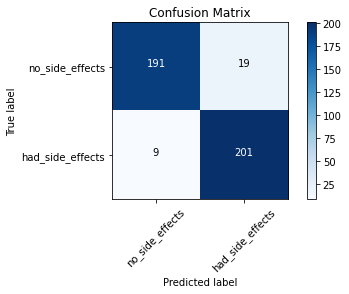

In [37]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')